### Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd
import os

In [32]:
dataLocation = "Recordings/SoftwareProject/"
os.listdir(dataLocation)

singleBlinkLoc = dataLocation + "OpenBCISession_2020-04-25_15-29-52-eyeblink/"
singleBlinkLoc = singleBlinkLoc + os.listdir(singleBlinkLoc)[0]

dataStartLine = 6

#### reading single blink

In [22]:
singleBlinkRaw = []

# Using readlines() 

count = 0
header = []
for line in open(singleBlinkLoc, 'r').readlines(): 
    if count >= dataStartLine:
#         print(line.strip().split(','))
        singleBlinkRaw.append(line.strip().split(','))
    else:
        header.append(line.strip().split(','))
        count += 1
singleBlinkRaw = np.char.strip(np.array(singleBlinkRaw))

# with open(singlBlinkLoc) as f:
#     singleBlinkRaw = np.array(f.read().splitlines()[dataStartLine:])

In [23]:
header

[['%OpenBCI Raw EEG Data'],
 ['%Number of channels = 4'],
 ['%Sample Rate = 200.0 Hz'],
 ['%First Column = SampleIndex'],
 ['%Last Column = Timestamp'],
 ['%Other Columns = EEG data in microvolts followed by Accel Data (in G) interleaved with Aux Data']]

In [7]:
singleBlinkRaw

array([['0', '152.06', '-265.02', ..., '0.000', '15:30:25.402',
        '1587846625402'],
       ['1', '158.57', '-259.45', ..., '0.000', '15:30:25.418',
        '1587846625418'],
       ['2', '169.74', '-239.23', ..., '0.000', '15:30:25.418',
        '1587846625418'],
       ...,
       ['70', '149.06', '-246.25', ..., '0.000', '15:31:00.937',
        '1587846660937'],
       ['71', '121.62', '-280.72', ..., '0.000', '15:31:00.938',
        '1587846660938'],
       ['72', '146.45', '-248.59', ..., '0.000', '15:31:00.938',
        '1587846660938']], dtype='<U14')

### Graphing the data

#### Data Format:
##### [index, channel1, channel2, channel3, channel4, X, X, X, Time, Voltage]

In [8]:
# getting just the data channels recorded
singleBlinkChannels = singleBlinkRaw[:, 1:5]
singleBlinkTime = singleBlinkRaw[:, 8:9]

#### plot the data

In [9]:
singleBlinkTime[1:10]

array([['15:30:25.418'],
       ['15:30:25.418'],
       ['15:30:25.431'],
       ['15:30:25.431'],
       ['15:30:25.432'],
       ['15:30:25.432'],
       ['15:30:25.447'],
       ['15:30:25.447'],
       ['15:30:25.461']], dtype='<U14')

In [10]:
timeThing = "15:30:25.402"

In [11]:
from datetime import datetime

datetime_object = datetime.strptime(timeThing, '%H:%M:%S.%f')

In [12]:
datetime_object

datetime.datetime(1900, 1, 1, 15, 30, 25, 402000)

### What the Raw data for channel 0 looks like

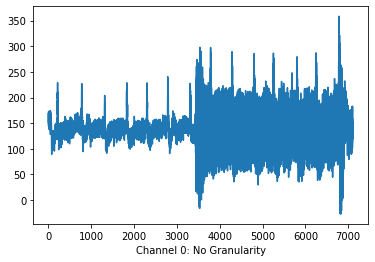

In [27]:
granularity = 1
data = singleBlinkChannels[:,0][::granularity]
plt.plot(np.arange(len(data)), data.astype(float))
plt.xlabel('Channel 0: No Granularity')
plt.show()

### First 500 Data Points for channel 0

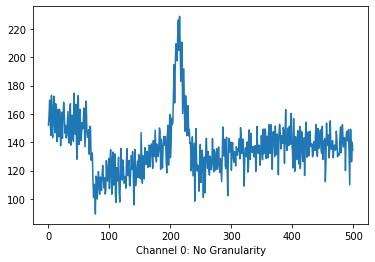

In [28]:
granularity = 1
data = singleBlinkChannels[:,0][:500:granularity]
plt.plot(np.arange(len(data)), data.astype(float))
plt.xlabel('Channel 0: No Granularity')
plt.show()

## Below we attempt to make Channel 0 easier to read visually

#### Plotted channel 0
#### First 500 Points
##### channel vs standard step for every point (not properly time synced)

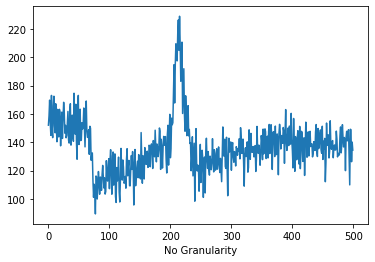

In [13]:
granularity = 1
data = singleBlinkChannels[:,0][:500:granularity]
plt.plot(np.arange(len(data)), data.astype(float))
plt.xlabel('No Granularity')
plt.show()

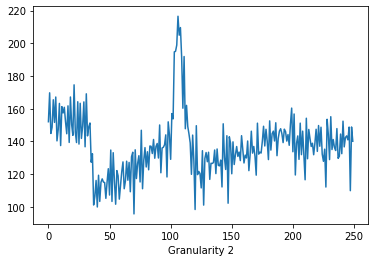

In [14]:
granularity = 2
data = singleBlinkChannels[:,0][:500:granularity]
plt.plot(np.arange(len(data)), data.astype(float))
plt.xlabel('Granularity 2')
plt.show()

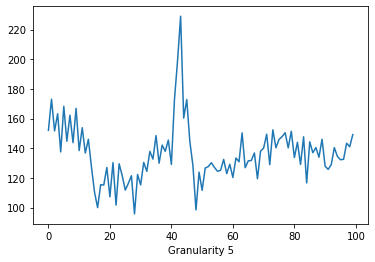

In [15]:
granularity = 5
data = singleBlinkChannels[:,0][:500:granularity]
plt.plot(np.arange(len(data)), data.astype(float))
plt.xlabel('Granularity 5')
plt.show()

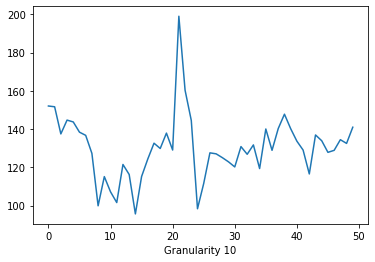

In [16]:
granularity = 10
data = singleBlinkChannels[:,0][:500:granularity]
plt.plot(np.arange(len(data)), data.astype(float))
plt.xlabel('Granularity 10')
plt.show()

### Plot multiple channels

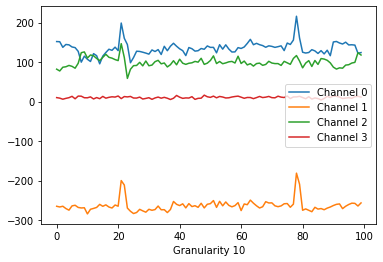

In [17]:
granularity = 10
# 7000 inputs, how much am i reading until
numDataRead = 1000
channel0 = singleBlinkChannels[:,0][:numDataRead:granularity]
channel1 = singleBlinkChannels[:,1][:numDataRead:granularity]
channel2 = singleBlinkChannels[:,2][:numDataRead:granularity]
channel3 = singleBlinkChannels[:,3][:numDataRead:granularity]
plt.plot(np.arange(len(channel0)), channel0.astype(float), label = 'Channel 0')
plt.plot(np.arange(len(channel1)), channel1.astype(float), label = 'Channel 1')
plt.plot(np.arange(len(channel2)), channel2.astype(float), label = 'Channel 2')
plt.plot(np.arange(len(channel3)), channel3.astype(float), label = 'Channel 3')
plt.xlabel('Granularity 10')
plt.legend(loc = 'center right')
plt.show()

# Plotting All Data

In [35]:
def plot_initial(plot_type, title):
    os.listdir(dataLocation)
    singleBlinkLoc = dataLocation + plot_type
    singleBlinkLoc = singleBlinkLoc + os.listdir(singleBlinkLoc)[0]
    dataStartLine = 6
    singleBlinkRaw = []
    count = 0
    for line in open(singleBlinkLoc, 'r').readlines(): 
        if count >= dataStartLine:
            singleBlinkRaw.append(line.strip().split(','))
        else:
            count += 1
    singleBlinkRaw = np.char.strip(np.array(singleBlinkRaw))
    
    granularity = 10
    # getting just the data channels recorded
    singleBlinkChannels = singleBlinkRaw[:, 1:5]
    singleBlinkTime = singleBlinkRaw[:, 8:9]

    timeThing = "15:30:25.402"
    datetime_object = datetime.strptime(timeThing, '%H:%M:%S.%f')
    data = singleBlinkChannels[:,0][:500:granularity]

    channel0 = singleBlinkChannels[:,0][:500:granularity]
    channel1 = singleBlinkChannels[:,1][:500:granularity]
    channel2 = singleBlinkChannels[:,2][:500:granularity]
    channel3 = singleBlinkChannels[:,3][:500:granularity]

    plt.plot(np.arange(len(channel0)), channel0.astype(float), label = 'Channel 0')
    plt.plot(np.arange(len(channel1)), channel1.astype(float), label = 'Channel 1')
    plt.plot(np.arange(len(channel2)), channel2.astype(float), label = 'Channel 2')
    plt.plot(np.arange(len(channel3)), channel3.astype(float), label = 'Channel 3')
    plt.xlabel('Granularity 10')
    plt.ylabel('Hz')
    plt.title(title)
    plt.legend(loc = 'center right')
    plt.show()

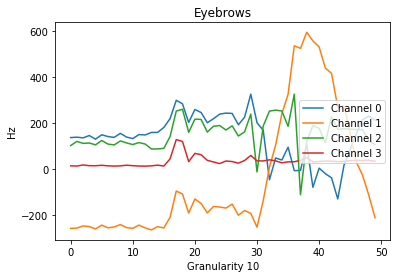

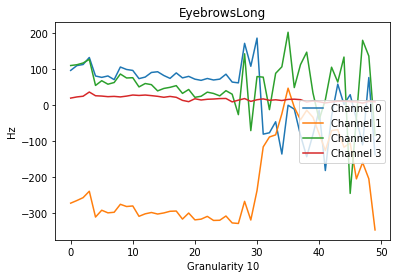

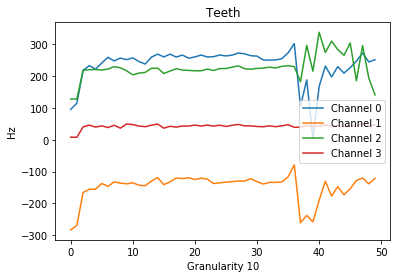

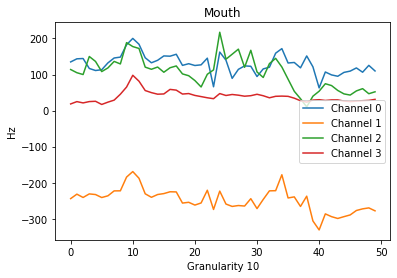

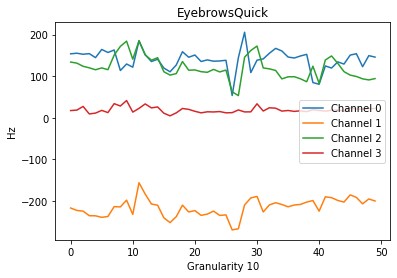

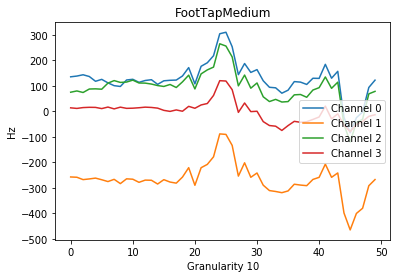

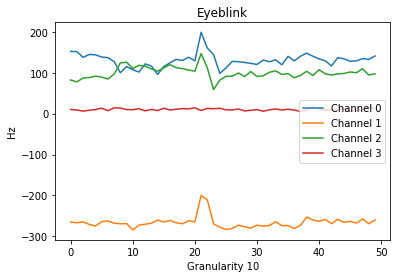

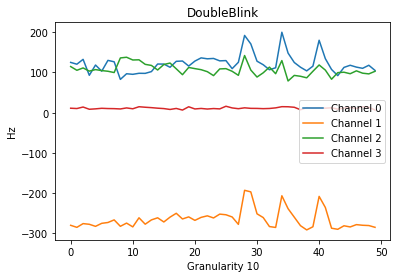

In [37]:
inputs = os.listdir(dataLocation)
titles = ['Eyebrows', 'EyebrowsLong', 'Teeth', 'Mouth', 'EyebrowsQuick', 'FootTapMedium', 'Eyeblink', 'DoubleBlink' ]
inputs.remove("README.md")
count = 0
for i in inputs:
    plot_initial(i + '/', titles[count])
    count+=1

### How to classify???
#### take all 4 channels and one observation is a set of data 5 seconds long?
#### so then if u want to do it live u only start making predictions after 5 seconds of data input and take the last 5 seconds of data every second and classify and see which label we get

['OpenBCISession_2020-04-25_15-39-46eyebrowse',
 'OpenBCISession_2020-04-25_15-41-43eyebrowselong',
 'OpenBCISession_2020-04-25_15-36-55teeth',
 'README.md',
 'OpenBCISession_2020-04-25_15-44-17mouth',
 'OpenBCISession_2020-04-25_15-43-20eyebrowsequick',
 'OpenBCISession_2020-04-25_15-35-35foottapmedium',
 'OpenBCISession_2020-04-25_15-29-52-eyeblink',
 'OpenBCISession_2020-04-25_15-33-30doubleblink']